###**End Semester Project**

**Group Members:**

*   Urooj Fatima Raza
*   kaynat sajid
*   Azka Khan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd gdrive/My Drive/Data Project


Mounted at /content/drive
Mounted at /content/gdrive
/content/gdrive/My Drive/Data Project


## **Data Read**

In [ ]:
from __future__ import print_function
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import pandas as pd

pd.__version__
#Setting names for the csv header
headernames = ['review', 'product', 'type', 'rating']

#opening the csv file
dataset = pd.read_csv('/content/gdrive/MyDrive/Data Project/Dataset.csv',encoding = "ISO-8859-1", names = headernames)

dataset.head()
#print(dataset.head())
#Seperating the input features and output labels
X = dataset.iloc[:,0:2].values
y = dataset.iloc[:, 2].values
y1 = dataset.iloc[:,3].values
#print(X)
#print(y)
#print(y1)

# **Exploratory Data Analysis (EDA)**

## **Visualize sentiment analysis output**

This section will demonstrate how to analyze, visualize, and interpret the sentiment scores generated by the previous steps.

Use the describe method in pandas to generate summary statics of values in the Sentiment_score field. These summary statistics reveal the numerical insights of this dataset using aggregate metrics like count, min, max, median, etc.

The code snippet below generates summary statistics of sentiment_score field of df_output dataframe.

**Summary statistics**

In [ ]:
dataset.dtypes
dataset['review'].describe()

count      230
unique     229
top       Good
freq         2
Name: review, dtype: object

In [ ]:
dataset.dtypes
dataset['product'].describe()

count        230
unique         6
top       cerave
freq          75
Name: product, dtype: object

In [ ]:
dataset.dtypes
dataset['type'].describe()

count      230
unique       4
top       good
freq       130
Name: type, dtype: object

A quick review of these summary statistics reveals the following insights.

    The min, which indicates the polarity or intensity of the most negative response is strongly negative (range of sentiment polarity score is -1 to +1)
    The max, which indicates the polarity or intensity of the most positive response is highly positive (range of sentiment polarity score is -1 to +1)
    The mean,which indicates the average polarity or intensity of sentiment across all responses is in the positive territory.


In [ ]:
dataset.dtypes
dataset['rating'].describe()

count    230.000000
mean       4.247826
std        0.715499
min        3.000000
25%        3.600000
50%        4.550000
75%        4.900000
max        5.100000
Name: rating, dtype: float64

**plot mean of sentiment score by Rating**

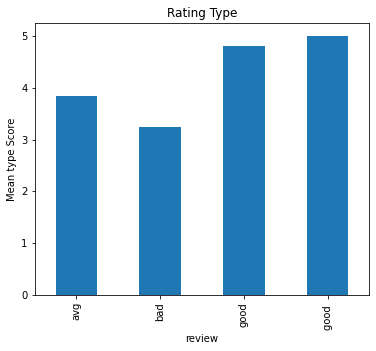

In [ ]:
#generate plot
dfg = dataset.groupby(['type'])['rating'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Rating Type', ylabel='Mean type Score',
         xlabel='review', figsize=(6, 5))

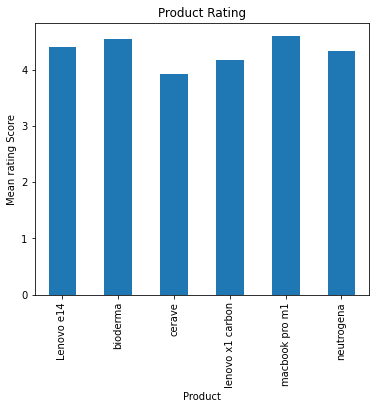

In [ ]:
dfg = dataset.groupby(['product'])['rating'].mean()
dfg.plot(kind='bar', title='Product Rating', ylabel='Mean rating Score',
         xlabel='Product', figsize=(6, 5))

product
Lenovo e14          AxesSubplot(0.125,0.125;0.775x0.755)
bioderma            AxesSubplot(0.125,0.125;0.775x0.755)
cerave              AxesSubplot(0.125,0.125;0.775x0.755)
lenovo x1 carbon    AxesSubplot(0.125,0.125;0.775x0.755)
macbook pro m1      AxesSubplot(0.125,0.125;0.775x0.755)
neutrogena          AxesSubplot(0.125,0.125;0.775x0.755)
Name: rating, dtype: object

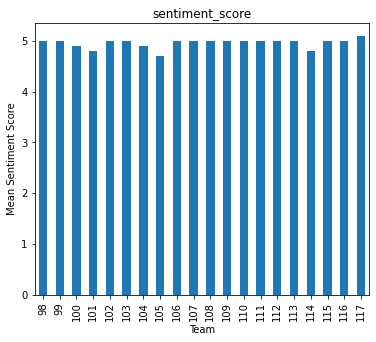

In [ ]:
dfg = dataset.groupby(['product'])['rating']
dfg.plot(kind='bar', title='sentiment_score', ylabel='Mean Sentiment Score',
         xlabel='Team', figsize=(6, 5))

**Boxplot**

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

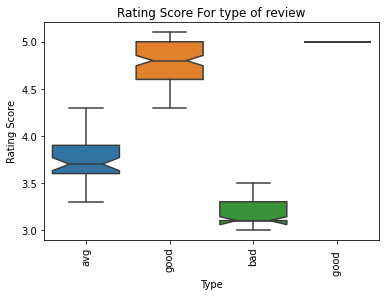

In [ ]:
import seaborn as sns
#create seaborn boxplots by group
sns.boxplot(x='type', y='rating', notch = True,data=dataset, showfliers=False).set(title='Rating Score For type of review')
#modify axis labels
plt.xlabel('Type')
plt.ylabel('Rating Score')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

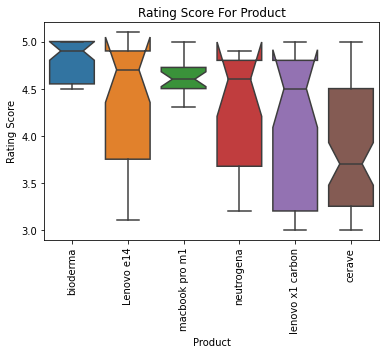

In [ ]:
import seaborn as sns
#create seaborn boxplots by group
sns.boxplot(x='product', y='rating', notch = True,data=dataset, showfliers=False).set(title='Rating Score For Product')
#modify axis labels
plt.xlabel('Product')
plt.ylabel('Rating Score')
plt.xticks(rotation=90)

**Seaborn Plot**

Set-up ready


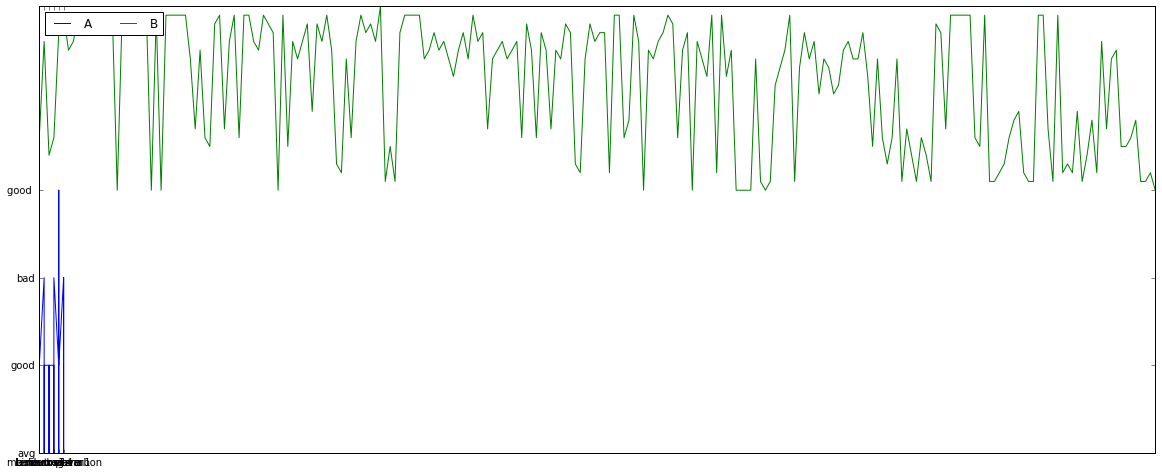

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

print("Set-up ready")

plt.figure(figsize=(20,8))
plt.plot(dataset['product'],dataset['type'],dataset['rating'])
plt.legend('ABCDEF', ncol=3, loc='upper left');


**Pair Plots**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

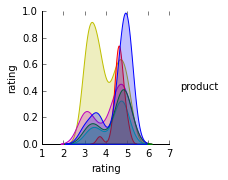

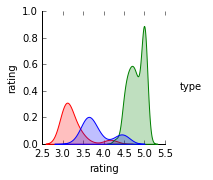

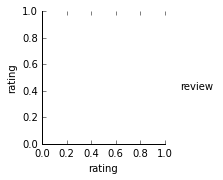

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,8))

sns.pairplot(dataset, hue='product', size=2.5)
sns.pairplot(dataset, hue='type', size=2.5)
sns.pairplot(dataset, hue='review', size=2.5)

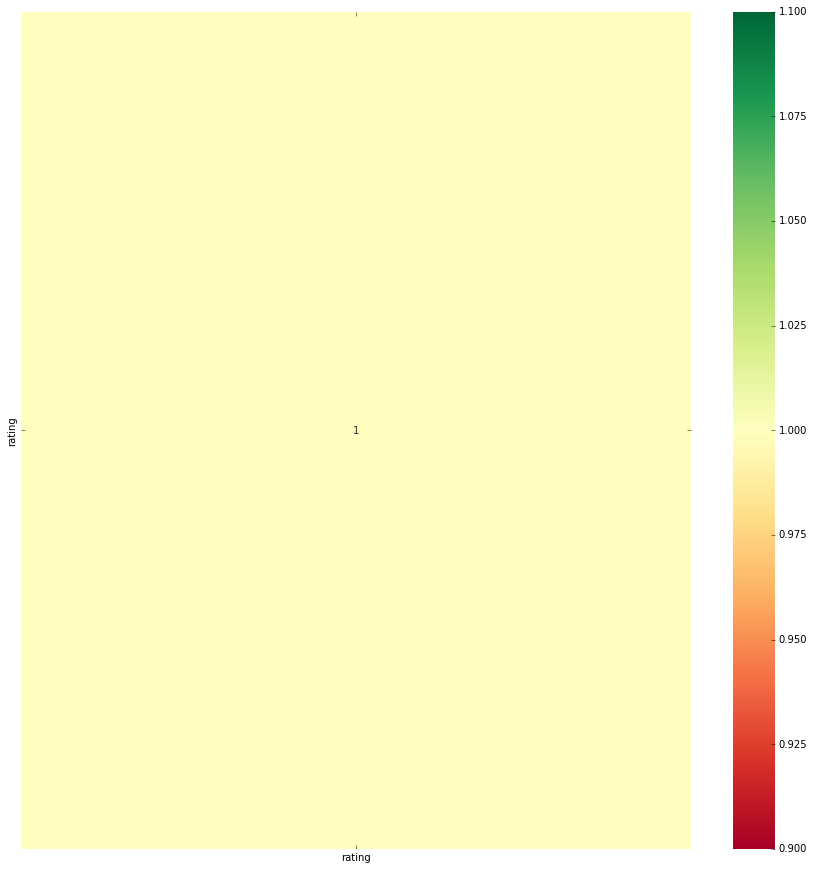

In [ ]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## **Data Preprocessing**

In [ ]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.3.5'

In [ ]:
print(dataset.shape)

(230, 4)


In [ ]:
''' we use Beautiful soap4 for removing HTML tags
pip install beautifulsoup4
'''
'''
Punctuation and numbers also don’t help in deciding the sentiment of a review.
We will remove them using the package re (regular expression). 

Removing punctuation is a common preprocessing step in many data analysis and machine learning tasks.

if you’re working on user-generated text data such as social media posts, you’d encounter too much punctuation in the sentences, which may not be useful for the task at hand, and so removing all of them becomes an essential pre-processing task.

'''
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

#dataset = pd.read_csv("../input/customer-support-on-twitter/twcs/twcs.csv", nrows=5000)
df = dataset[["review"]]
df["review"] = df["review"].astype(str)
dataset.head()


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


,review,product,type,rating
0,Nice sunscreen but pricey and makes face littl...,bioderma,avg,3.6
1,its good for dry skin,bioderma,good,4.7
2,I like the high UVA protection that the suncre...,bioderma,bad,3.4
3,This sunscreen is extremly good at sun protect...,bioderma,avg,3.6
4,It has no scent so that's the best part actual...,bioderma,good,4.8



**Lower Casing**


*   
Lower casing is a common text preprocessing technique. The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.
*   
This is more helpful for text featurization techniques like frequency, tfidf as it helps to combine the same words together thereby reducing the duplication and get correct counts / tfidf values.

In [ ]:
df["review_lower"] = df["review"].str.lower()
df.head()

,review,review_lower
0,Nice sunscreen but pricey and makes face littl...,nice sunscreen but pricey and makes face littl...
1,its good for dry skin,its good for dry skin
2,I like the high UVA protection that the suncre...,i like the high uva protection that the suncre...
3,This sunscreen is extremly good at sun protect...,this sunscreen is extremly good at sun protect...
4,It has no scent so that's the best part actual...,it has no scent so that's the best part actual...



**Removal of Punctuations**



*   One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.






In [ ]:
# drop the new column created in last cell
'''df.drop(["review_lower"], axis=1, inplace=True)'''

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(review):
    """custom function to remove the punctuation"""
    return review.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["review_wo_punct"] = df["review"].apply(lambda review: remove_punctuation(review))
df.head()

,review,review_lower,review_wo_punct
0,Nice sunscreen but pricey and makes face littl...,nice sunscreen but pricey and makes face littl...,Nice sunscreen but pricey and makes face littl...
1,its good for dry skin,its good for dry skin,its good for dry skin
2,I like the high UVA protection that the suncre...,i like the high uva protection that the suncre...,I like the high UVA protection that the suncre...
3,This sunscreen is extremly good at sun protect...,this sunscreen is extremly good at sun protect...,This sunscreen is extremly good at sun protect...
4,It has no scent so that's the best part actual...,it has no scent so that's the best part actual...,It has no scent so thats the best part actuall...



**Removal of stopwords**



*   Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.




In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(review):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(review).split() if word not in STOPWORDS])

df["review_wo_stop"] = df["review_wo_punct"].apply(lambda review: remove_stopwords(review))
df.head()

,review,review_lower,review_wo_punct,review_wo_stop
0,Nice sunscreen but pricey and makes face littl...,nice sunscreen but pricey and makes face littl...,Nice sunscreen but pricey and makes face littl...,Nice sunscreen pricey makes face little shiny
1,its good for dry skin,its good for dry skin,its good for dry skin,good dry skin
2,I like the high UVA protection that the suncre...,i like the high uva protection that the suncre...,I like the high UVA protection that the suncre...,I like high UVA protection suncream offers giv...
3,This sunscreen is extremly good at sun protect...,this sunscreen is extremly good at sun protect...,This sunscreen is extremly good at sun protect...,This sunscreen extremly good sun protection Th...
4,It has no scent so that's the best part actual...,it has no scent so that's the best part actual...,It has no scent so thats the best part actuall...,It scent thats best part actually product seem...



**Removal of Frequent words and Removal of Rare word**


*   In the previos preprocessing step, we removed the stopwords based on language information. But say, if we have a domain specific corpus, we might also have some frequent words which are of not so much importance to us.
*   So this step is to remove the frequent words in the given corpus. If we use something like tfidf, this is automatically taken care of.






In [ ]:
from collections import Counter
cnt = Counter()
for review in df["review_wo_stop"].values:
    for word in review.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('I', 400),
 ('skin', 81),
 ('white', 70),
 ('use', 66),
 ('sunscreen', 65),
 ('laptop', 62),
 ('face', 53),
 ('The', 51),
 ('good', 50),
 ('This', 50)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(review):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(review).split() if word not in FREQWORDS])

df["review_wo_stopfreq"] = df["review_wo_stop"].apply(lambda review: remove_freqwords(review))
df.head()

,review,review_lower,review_wo_punct,review_wo_stop,review_wo_stopfreq
0,Nice sunscreen but pricey and makes face littl...,nice sunscreen but pricey and makes face littl...,Nice sunscreen but pricey and makes face littl...,Nice sunscreen pricey makes face little shiny,Nice pricey makes little shiny
1,its good for dry skin,its good for dry skin,its good for dry skin,good dry skin,dry
2,I like the high UVA protection that the suncre...,i like the high uva protection that the suncre...,I like the high UVA protection that the suncre...,I like high UVA protection suncream offers giv...,like high UVA protection suncream offers give ...
3,This sunscreen is extremly good at sun protect...,this sunscreen is extremly good at sun protect...,This sunscreen is extremly good at sun protect...,This sunscreen extremly good sun protection Th...,extremly sun protection thing doesnt liked lea...
4,It has no scent so that's the best part actual...,it has no scent so that's the best part actual...,It has no scent so thats the best part actuall...,It scent thats best part actually product seem...,It scent thats best part actually product seem...


In [ ]:
# Drop the two columns which are no more needed 
#df.drop(["review_wo_punct", "review_wo_stop"], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(review):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(review).split() if word not in RAREWORDS])

df["review_wo_stopfreqrare"] = df["review_wo_stopfreq"].apply(lambda review: remove_rarewords(review))
df.head()

,review,review_lower,review_wo_punct,review_wo_stop,review_wo_stopfreq,review_wo_stopfreqrare
0,Nice sunscreen but pricey and makes face littl...,nice sunscreen but pricey and makes face littl...,Nice sunscreen but pricey and makes face littl...,Nice sunscreen pricey makes face little shiny,Nice pricey makes little shiny,Nice pricey makes little shiny
1,its good for dry skin,its good for dry skin,its good for dry skin,good dry skin,dry,dry
2,I like the high UVA protection that the suncre...,i like the high uva protection that the suncre...,I like the high UVA protection that the suncre...,I like high UVA protection suncream offers giv...,like high UVA protection suncream offers give ...,like high UVA protection suncream offers give ...
3,This sunscreen is extremly good at sun protect...,this sunscreen is extremly good at sun protect...,This sunscreen is extremly good at sun protect...,This sunscreen extremly good sun protection Th...,extremly sun protection thing doesnt liked lea...,extremly sun protection thing doesnt liked lea...
4,It has no scent so that's the best part actual...,it has no scent so that's the best part actual...,It has no scent so thats the best part actuall...,It scent thats best part actually product seem...,It scent thats best part actually product seem...,It scent thats best part actually product seem...


In [ ]:
dataset.head()

,review,product,type,rating
0,Nice sunscreen but pricey and makes face littl...,bioderma,avg,3.6
1,its good for dry skin,bioderma,good,4.7
2,I like the high UVA protection that the suncre...,bioderma,bad,3.4
3,This sunscreen is extremly good at sun protect...,bioderma,avg,3.6
4,It has no scent so that's the best part actual...,bioderma,good,4.8


In [ ]:
df.head()

,review,review_lower,review_wo_punct,review_wo_stop,review_wo_stopfreq,review_wo_stopfreqrare
0,Nice sunscreen but pricey and makes face littl...,nice sunscreen but pricey and makes face littl...,Nice sunscreen but pricey and makes face littl...,Nice sunscreen pricey makes face little shiny,Nice pricey makes little shiny,Nice pricey makes little shiny
1,its good for dry skin,its good for dry skin,its good for dry skin,good dry skin,dry,dry
2,I like the high UVA protection that the suncre...,i like the high uva protection that the suncre...,I like the high UVA protection that the suncre...,I like high UVA protection suncream offers giv...,like high UVA protection suncream offers give ...,like high UVA protection suncream offers give ...
3,This sunscreen is extremly good at sun protect...,this sunscreen is extremly good at sun protect...,This sunscreen is extremly good at sun protect...,This sunscreen extremly good sun protection Th...,extremly sun protection thing doesnt liked lea...,extremly sun protection thing doesnt liked lea...
4,It has no scent so that's the best part actual...,it has no scent so that's the best part actual...,It has no scent so thats the best part actuall...,It scent thats best part actually product seem...,It scent thats best part actually product seem...,It scent thats best part actually product seem...


## **Converting input to vector**

In [ ]:
from sklearn import preprocessing
import pandas as pd 
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
print(df.columns[5])
data = df[df.columns[5]]

train_x = data.to_numpy().flatten()
print('train_x',train_x)
vectorizer = CountVectorizer(binary=True)
vector = vectorizer.fit_transform(train_x)
print(vector)

review_wo_stopfreqrare
train_x ['Nice pricey makes little shiny' 'dry'
 'like high UVA protection suncream offers give whitecast especially eyebrows beard looks quite bad Also sometimes peels bad regret applying first place'
 'extremly sun protection thing doesnt liked leaves patches applying'
 'It scent thats best part actually product seems reacted little different informed seller kind enough respond quick resolve'
 'Superb Go'
 'ItÕs product recommended dermat needs apply intervals Depends type Works perfect combination'
 'Great packaging Trusted reliable technology high sun protection product better every aspect previous one truly worth extra 200INR doesnt burn sting eye cream fluid consistency Provides one highest UVA Protection marketI hope come bigger volume100ml packaging would perfect'
 'bought lot deliberation glad dry sun cream bought past sticky would give feeling sweaty great feeling used almost finished wouldnt mind little bit fragrance none okay It gives cast one spread 

**Finding TFIDF**
The bag of words approach works fine for converting text to numbers. However, it has one drawback. It assigns a score to a word based on its occurrence in a particular document. It doesn't take into account the fact that the word might also be having a high frequency of occurrence in other documents as well. TFIDF resolves this issue by multiplying the term frequency of a word by the inverse document frequency. The TF stands for "Term Frequency" while IDF stands for "Inverse Document Frequency".

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
vector = tfidfconverter.fit_transform(vector).toarray()

**converting output (parties) into numerical form**

In [ ]:
#converting text labels to numeric form
labels, unique = pd.factorize(y)
labels1 ,unique = pd.factorize(y1)
'''

response

'''

#print('labels: ',labels)
print('labels1: ',labels1)
#splitting data in test and train segments
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, labels, test_size = 0.20)
X_train1, X_test1, y_train1, y_test1 = train_test_split(vector, labels1, test_size = 0.20)
#print('x_train : ',X_train)
print('x_test1: ',X_test)
print('y_test1: ',y_test)

labels1:  [ 0  1  2  0  3  4  5  1  4  4  4  4  4  4  4  4  6  4  4  4  3  3  4  6
  4  6  4  4  4  4  4  7  8  5  0  9 10  4  8  1  4  0  4  4  1  5  4 10
  3  6  4  9  1  7  1 10 11 10  1  4  5 12 13  7  0  1  4  3 10  1 14 15
  9 15  3  4  4  4  4  7  5  3  5  1  7 16  5  3  7  4  1  3  8  7  5  1
  7  5  1  0 10  5  0  3  5  8  5  7 10  3 12 13  7 10  1  3  3 13  4  4
  0 17  4  1  6  5  7  1  3  4 10  0  5  3  6  1  7 16  4 13  4 16  5  6
  6  6  6  7 15  6 15 18 19  5  4 15 19  3  7  1 20  7 19 20 18  5  1  7
  7  3 16  9  7  0 12  0  7 15  8  2 15  0  2 15 10  3  8  4  4  4  4  4
  0  9  4 15 15 13 12  0 17 11 13 15 15  4  4  8 15  4 13 12 13 11 15  2
 17 13  1  8  7  5  9  9  0 17 15 15 13  6]
x_test1:  [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.19379764 0.   

# **Training Text Classification Model and Predicting Sentiment**

###**1. RandomForest**

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
#converting text labels to numeric form
labels, unique = pd.factorize(y)
labels1 ,unique = pd.factorize(y1)


**FOR Type :**

In [ ]:

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [ ]:
print(y_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 2 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
Accuracy: 0.7391304347826086


In [ ]:
report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.71      1.00      0.83        29
           2       1.00      0.31      0.47        13
           3       0.00      0.00      0.00         1

    accuracy                           0.74        46
   macro avg       0.68      0.41      0.45        46
weighted avg       0.79      0.74      0.69        46



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**FOR Rating**


In [ ]:

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train1,y_train1)

y_pred=clf.predict(X_test1)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))

[4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4]
Accuracy: 0.10869565217391304


In [ ]:
report = metrics.classification_report(y_test1,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.12      0.71      0.20         7
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2

    accuracy              

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Evaluating the Model**
To evaluate the performance of a classification model such as the one that we just trained, we can use metrics such as the confusion matrix, F1 measure, and the accur

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 0  0  0  0  3]
 [ 0  0  0  3 26]
 [ 0  0  0  0 13]
 [ 0  0  0  0  1]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00      29.0
           2       0.00      0.00      0.00      13.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00      46.0
   macro avg       0.00      0.00      0.00      46.0
weighted avg       0.00      0.00      0.00      46.0

0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

From the output, it can be seen that our model achieved an accuracy of 87.5%, which is very good given the fact that we randomly chose all the parameters for CountVectorizer as well as for our random forest algorithm.

### **2. SVMS Classification**

**Prediction for output1(Type)**

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
lin = svm.SVC(kernel = 'linear').fit(X_train,y_train)

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
lin_pred = lin.predict(X_test)

print('rbf_pred', rbf_pred)

#=====================================================
#   Accuracy through RBF Kernel
#=====================================================
rbf_pred = rbf.predict(X_train)
rbf_accuracy = accuracy_score(y_train, rbf_pred)
rbf_f1 = f1_score(y_train, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

#=====================================================
#   Accuracy through linear Kernel
#=====================================================
print('\nlin_pred', lin_pred)
lin_pred = lin.predict(X_train)
lin_accuracy = metrics.accuracy_score(y_train, lin_pred)
lin_f1 = f1_score(y_train, lin_pred, average='weighted')
print('Accuracy (lin Kernel): ', "%.2f" % (lin_accuracy*100))
print('F1 (lin Kernel): ', "%.2f" % (lin_f1*100))

#=====================================================
#   Accuracy through poly Kernel
#=====================================================
print('\npoly_pred' , poly_pred)
poly_pred = poly.predict(X_train)
poly_accuracy = accuracy_score(y_train,poly_pred)
poly_f1 = f1_score(y_train,poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))


rbf_pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
Accuracy (RBF Kernel):  54.89
F1 (RBF Kernel):  38.91

lin_pred [1 0 1 2 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
Accuracy (lin Kernel):  98.91
F1 (lin Kernel):  98.90

poly_pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
Accuracy (Polynomial Kernel):  100.00
F1 (Polynomial Kernel):  100.00


**Prediction for output2(rating)**

In [ ]:
rbf1 = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train1, y_train1)
poly1 = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train1, y_train1)
lin1 = svm.SVC(kernel = 'linear').fit(X_train1,y_train1)

poly_pred1 = poly.predict(X_test1)
rbf_pred1 = rbf.predict(X_test1)
lin_pred1 = lin.predict(X_test1)

print('rbf_pred', rbf_pred1)

#=====================================================
#   Accuracy through RBF Kernel
#=====================================================
rbf_pred1 = rbf.predict(X_train1)
rbf_accuracy1 = accuracy_score(y_train1, rbf_pred1)
rbf_f1 = f1_score(y_train1, rbf_pred1, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

#=====================================================
#   Accuracy through linear Kernel
#=====================================================
print('\nlin_pred', lin_pred1)
lin_pred1 = lin.predict(X_train1)
lin_accuracy1 = metrics.accuracy_score(y_train1, lin_pred1)
lin_f1 = f1_score(y_train1, lin_pred1, average='weighted')
print('Accuracy (lin Kernel): ', "%.2f" % (lin_accuracy*100))
print('F1 (lin Kernel): ', "%.2f" % (lin_f1*100))

#=====================================================
#   Accuracy through poly Kernel
#=====================================================
print('\npoly_pred' , poly_pred1)
poly_pred1 = poly.predict(X_train1)
poly_accuracy1 = accuracy_score(y_train1,poly_pred1)
poly_f1 = f1_score(y_train1,poly_pred1, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))


rbf_pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
Accuracy (RBF Kernel):  54.89
F1 (RBF Kernel):  1.23

lin_pred [0 1 0 1 1 1 1 0 1 0 1 2 1 2 1 1 0 2 1 0 1 1 1 1 1 0 0 1 2 1 1 1 2 1 1 1 1
 1 1 2 2 0 2 0 1 0]
Accuracy (lin Kernel):  98.91
F1 (lin Kernel):  5.80

poly_pred [0 1 0 1 1 1 1 0 1 0 1 2 1 2 1 1 0 2 1 0 1 1 1 1 1 0 0 1 2 1 1 1 2 1 1 1 1
 1 1 2 2 0 2 0 1 0]
Accuracy (Polynomial Kernel):  100.00
F1 (Polynomial Kernel):  6.17


### **3. DECISION TREES IN PYTHON**




In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
#converting text labels to numeric form
labels, unique = pd.factorize(y)
labels1 ,unique = pd.factorize(y1)


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(vector, labels, test_size=0.3, random_state=1) # 70% training and 30% test
X_train1, X_test1, y_train1, y_test1 = train_test_split(vector, labels1, test_size=0.3, random_state=1)


In [ ]:
#=====================================================
#  Decision Trees (Type)
#=====================================================

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#=====================================================
#   Accuracy through Decision Trees (Type)
#=====================================================
print('\nY_pred', y_pred)
y_pred = clf.predict(X_test)
decision_accuracy = metrics.accuracy_score(y_test, y_pred)
decision_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy : ', "%.2f" % (decision_accuracy*100))
print('F1 : ', "%.2f" % (decision_f1*100))



Y_pred [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 2 2 1 1 2 1 1 0 0 1 1 0 2 0 1 2 2 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 2 1 1 2 1 0 1 1 1 2 0 1 1 0 0 1 1]
Accuracy :  39.13
F1 :  35.23


In [ ]:
#=====================================================
#  Decision Trees (Rating)
#=====================================================

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred = clf.predict(X_test1)

In [ ]:
#=====================================================
#   Accuracy through Decision Trees (Rating)
#=====================================================
print('\nY_pred', y_pred)
y_pred = clf.predict(X_test1)
decision_accuracy = metrics.accuracy_score(y_test1, y_pred)
decision_f1 = f1_score(y_test1, y_pred, average='weighted')
print('Accuracy : ', "%.2f" % (decision_accuracy*100))
print('F1 : ', "%.2f" % (decision_f1*100))



Y_pred [ 4  4  7  4 16  3  5  4  8 17  5  3  4  7  2  4 15  3  4  3  5 15  4 15
 13  4  4  1  3  6  2  1  2 10  3  4  3  4  4  3  1  0  4  4  4  8  0  4
  0  0 10  3  6  4  4  4  3  3  4  0 16  7  0  4  3  3  7  4 17]
Accuracy :  5.80
F1 :  3.24


In [ ]:
report = metrics.classification_report(y_test1,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         0
           3       0.15      0.50      0.24         4
           4       0.09      0.18      0.12        11
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

### **4. Naive Bayes**

In [ ]:
def preprocess_review(data):
    data = data.strip().lower()
    data = remove_punctuation(data)
    ", ".join(stopwords.words('english'))
    data = remove_stopwords(data)
    
    for word in data.split():
        cnt[word] += 1

    data = remove_freqwords(data)
    data = remove_rarewords(data)

    return data

In [ ]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
# Split into training and testing data
x = dataset['review'].astype(str)
y = dataset['type'].astype(str)
z = dataset['rating'].astype(str)

x, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

vec = CountVectorizer(stop_words='english')
x_train = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

model = MultinomialNB()
model.fit(x_train, y_train)
model.score(x_test, y_test)


z_train, z_test = train_test_split(z,test_size=0.25, random_state=42)


model1 = MultinomialNB()
model1.fit(x_train, z_train)
model1.score(x_test, z_test)

z_pred = model1.predict(x_train)

report = metrics.classification_report(z_train, z_pred)
print(report)

              precision    recall  f1-score   support

         3.0       1.00      0.50      0.67         6
         3.1       0.82      0.90      0.86        10
         3.2       1.00      0.71      0.83         7
         3.3       1.00      0.40      0.57         5
         3.4       1.00      0.50      0.67         4
         3.5       1.00      1.00      1.00         5
         3.6       0.55      0.86      0.67        14
         3.7       1.00      1.00      1.00         8
         3.8       1.00      1.00      1.00         3
         3.9       1.00      0.50      0.67         2
         4.1       1.00      0.50      0.67         2
         4.2       1.00      0.50      0.67         2
         4.3       1.00      0.67      0.80         3
         4.4       1.00      0.50      0.67         2
         4.5       1.00      0.73      0.84        11
         4.6       1.00      0.70      0.82        10
         4.7       0.85      0.73      0.79        15
         4.8       0.89    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("_____________________________________________________________________________")
review = input("Please enter the review you want to analyse: ")
review = preprocess_review(review)
r_type = model.predict(vec.transform([review]))
r_rating = model1.predict(vec.transform([review]))
print("This type is:", end =" ")
print(r_type)
print("This tweet is about:", end =" ")
print(r_rating)
print ("_____________________________________________________________________________")


_____________________________________________________________________________
Please enter the review you want to analyse: Mac is good it is recommended
This type is: ['good']
This tweet is about: ['5.0']
_____________________________________________________________________________
